## Shikhar Singh Bhadwal 

## Predict the percentage of an student based on the number of study hours.

In [1]:
import pandas as pd 

In [2]:
import numpy as np 

In [3]:
import matplotlib.pyplot as plt  
%matplotlib inline

In [4]:
# Introducing data 
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


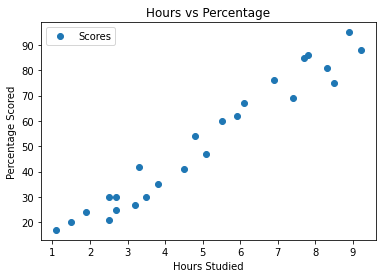

In [5]:
# Plot distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

## The graph shows there is a positive correlation between hours and percentage which proves there is a positive correlation between hours and percentage. 

In [6]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [8]:
## Training Algorithm 

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


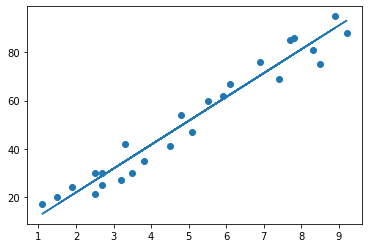

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Predictions after training 

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Compare Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Testing with 9.25 Hours 


In [13]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0].round (1)))

#Own Data
new_hr= np.array ([ 2.7, 3.5, 5.1, 7.8, 6.9, 4.2]). reshape(6,1)

#Prediction of percentage for new data
new_pred = regressor.predict(new_hr)

#Dataframe for new hour and predicted percentage 
new_hr= new_hr.reshape(6)
new_data=pd.DataFrame({'New_Hours': new_hr, 'New_Scores': new_pred})
new_data 

No of Hours = [[9.25]]
Predicted Score = 93.7


,New_Hours,New_Scores
0,2.7,28.776933
1,3.5,36.705458
2,5.1,52.562508
3,7.8,79.321281
4,6.9,70.401690
5,4.2,43.642917


## Ploting of New Data

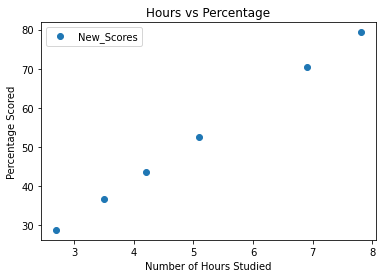

In [14]:
new_data.plot(x= 'New_Hours', y= 'New_Scores', style= 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Number of Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

## Accuracy of Model 

In [15]:
from sklearn import metrics 
print (' Absolute Mean Error: ',
      metrics.mean_absolute_error(y_test, y_pred))
print (' Mean Squared Error:',
      metrics.mean_squared_error(y_test, y_pred))

 Absolute Mean Error:  4.183859899002975
 Mean Squared Error: 21.5987693072174
